In order to demonstrate Factor analysis we are going to use a toy dataset created in the code below. In it we will mix both continous and categorical variables and implment FAMD using.both “light-FAMD” and “prince”.


In [84]:
#!pip install light-famd

We will create another toy dataset with both categorical and continuous data.

In [85]:
import pandas as pd
import numpy as np
from light_famd import FAMD
X_n = pd.DataFrame(data=np.random.randint(0,100,size=(10,2)),columns=list('AB'))
X_c =pd.DataFrame(np.random.choice(list('abcde'),size=(10,4),replace=True),columns =list('CDEF'))
X=pd.concat([X_n,X_c],axis=1)
print(X)

A   B  C  D  E  F
0  95  75  e  b  e  b
1  73  83  d  a  e  b
2  27  37  c  b  b  b
3  62   7  a  c  a  b
4  56  83  d  e  c  b
5  26  58  c  e  b  b
6  49  79  b  e  a  a
7  99  61  b  d  c  c
8  36  14  c  c  a  b
9   1  67  e  c  e  d


Now let use to FAMD to build a 2 component structure on the X dataset.

In [86]:
famd = FAMD(n_components=2)
famd.fit(X)

MCA PROCESS ELIMINATED 0  COLUMNS SINCE THEIR MISS_RATES >= 99%


FAMD(check_input=True, copy=False, engine='auto', n_components=2, n_iter=2,
     random_state=None)

In [87]:
print(famd.explained_variance_)
print(famd.transform(X))


[16.57396648  7.35499639]
[[ 4.33724199  3.5985027 ]
 [ 4.06175643  2.0303312 ]
 [ 5.04293769 -0.16621036]
 [ 4.60539694 -0.11273118]
 [ 4.16714231 -2.25463069]
 [ 5.16452638 -2.11087964]
 [ 2.0421419  -4.01060913]
 [ 0.59055771 -3.26901097]
 [ 5.42646998 -0.51584762]
 [ 2.40544046  4.45662134]]


We will do the exact same using prince.

In [88]:
#!pip install prince

In [89]:
import prince
famd = prince.FAMD(n_components=2, n_iter=3,copy=True,check_input=True,engine='auto', random_state=42 )
famd = famd.fit(X) 
#famd.row_coordinates(X)
famd.transform(X)

0                    1
0              4.33724              3.59850
1              4.06176              2.03033
2              5.04294             -0.16621
3              4.60540             -0.11273
4              4.16714             -2.25463
5              5.16453             -2.11088
6              2.04214             -4.01061
7              0.59056             -3.26901
8              5.42647             -0.51585
9              2.40544              4.45662

No handles with labels found to put in legend.


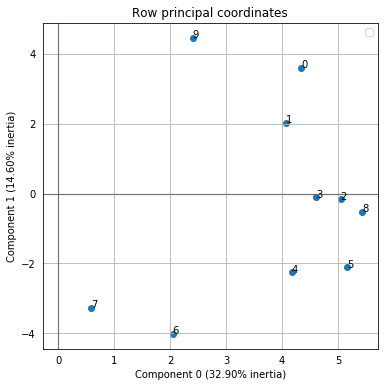

In [90]:
ax = famd.plot_row_coordinates(X,ax=None,figsize=(6, 6),x_component=0, y_component=1,labels=X.index,
                               ellipse_outline=False,
                               ellipse_fill=True,
                               show_points=True)


[0.47129606 0.11025193 0.0955859 ]
0.677133893974857
Score
0.6917341566363469
Mean Absolute Error: 4.754450843038357
Mean Squared Error: 49.20217769973319
Root Mean Squared Error: 7.014426398482858


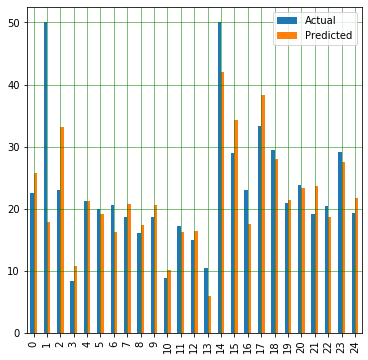

In [27]:
from sklearn.datasets import load_boston
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

import pandas as pd
import numpy as np

data = load_boston()

#print(data.target)
X = StandardScaler(with_mean=True,with_std=True).fit_transform(data.data)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())
#train using use PCA values
X_train, X_test, y_train, y_test = train_test_split(X_pca, data.target, test_size=0.2, random_state=0)
#train using all original values
#X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

print("Score")
print(regressor.score(X_train,y_train))

y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

df.head()
df1 = df.head(25)
df1.plot(kind='bar',figsize=(6,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()




#**Conclusions**

We have implemented a FAMD using both "light-FAMD" and "prince". Both methods have produced transformed components that can represent our original data.

Now I would like you to take the boston housing" data from Scikit-learn and see if you can reduce the dataset to a smaller number of features and then use these features to predict house prices. Share your thoughts in the comments section.